# Project1: Exploring weather trends datasets

## Table of contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#dataext">Weather Data Extraction from database</a></li>
    <li><a href="#dataexpo">Weather Data Exploration and Analysis</a></li>
    <li><a href="#dataviz">Weather Data Visualization</a></li>
    <li><a href="#dataobs">Observations</a></li>
    
</ul>


## Introduction

The aim of the project is analyze temperature data locally and globally in order to compare the temperature trends in Paris to the overall global temperature.
In order to achieve this task, we will start extracting the data from database and export it into CSV file, for this we will write SQL queries for:
* Extraction the city level data and export the extracted data into a CSV file
* Extraction the global level data and export the extracted data into a CSV file

We will use python to analyze the extracted data and create a line chart in order to compare the temperature trends in Paris with global temperatures. We will finally finish this study, by an observations by trying to answer these questions
* Is Paris hotter or cooler on average compared to the global average? Has the difference been consistent over time?
* “How do the changes in Paris’s temperatures over time compare to the changes in the global average?”
* What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?


## Weather data extraction from database

In order to explore the weather trends, the temperature data of the nearest city for instance Paris have been extracted from the city_data table filtering where city is equal to Paris thanks to the following query:

   `SELECT * FROM CITY_DATA WHERE CITY = 'Paris'`

The global temperature data are extracted from the table GLOBAL_DATA using the following SQL request:

   `SELECT * FROM GLOBAL_DATA`

The extracted data from database for global and local weather data are then exported into a csv file for analysis.


## Weather data exploration and Analysis

For the analysis of the weather data, we will use python pandas library

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Paris temperature dataset
paris_data = pd.read_csv("paris_data.csv", index_col="year")

# Print the fifth rows of paris_data DataFrame
paris_data.head()

,city,country,avg_temp
year,,,
1743,Paris,France,7.65
1744,Paris,France,11.48
1745,Paris,France,4.73
1746,Paris,France,NaN
1747,Paris,France,NaN


In [12]:
# Printing concise summary of the DataFrame 
paris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 1743 to 2013
Data columns (total 3 columns):
city        271 non-null object
country     271 non-null object
avg_temp    267 non-null float64
dtypes: float64(1), object(2)
memory usage: 8.5+ KB


In [4]:
# Getting predictive statics about the dataset
paris_data.describe()

,avg_temp
count,267.000000
mean,10.376105
std,0.799216
min,4.730000
25%,9.990000
50%,10.390000
75%,10.800000
max,12.330000


In [10]:
# Printing concise summary of the DataFrame 
global_data = pd.read_csv("global_data.csv", index_col='year')
global_data.head()

,avg_temp
year,
1750,8.72
1751,7.98
1752,5.78
1753,8.39
1754,8.47


In [11]:
# Printing concise summary of the DataFrame
global_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 1750 to 2015
Data columns (total 1 columns):
avg_temp    266 non-null float64
dtypes: float64(1)
memory usage: 4.2 KB



## Weather Data Visualization

For the comparison of Paris tempartures with the global, we will plot line charts for both data set. However, in order to visualize a more clear trends of data, we will plot their moving average rather the yearly avarage. For the calculation of the moving average of temperature the pandas.rolling method will be used on the avg_temp [pandas.core.window.Rolling.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.Rolling.mean.html)  

In [33]:
# Moving average of paris temparature
# avg_temp column selection in order to calculate the moving average
paris_avg_temp_mean = paris_data[['avg_temp']]
avg_temp_mean = paris_avg_temp_mean.rolling(12).mean()

In [32]:
# Moving average global temperature 
# avg_temp column selection in order to calculate the moving average
global_avg_temp = global_data[['avg_temp']]
global_avg_temp_mean = global_avg_temp.rolling(12).mean()

(1743, 2013)

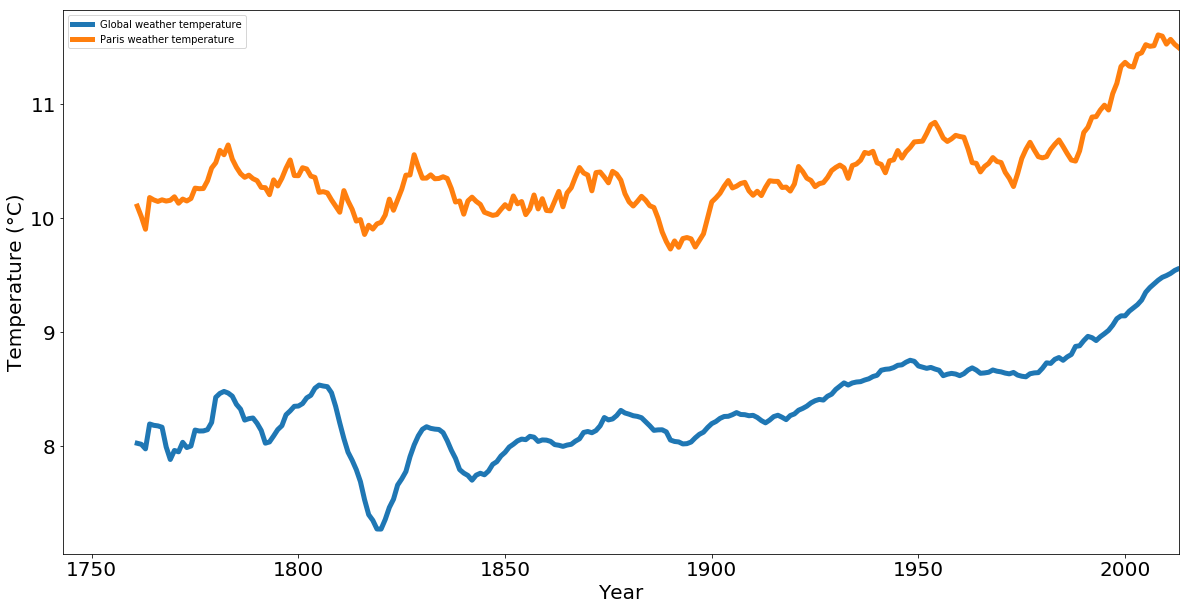

In [42]:
ax = global_avg_temp_mean.plot(figsize=(20,10), linewidth=5, fontsize=20)
avg_temp_mean.plot(ax=ax, figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.ylabel('Temperature (°C)', fontsize=20)
ax.legend(["Global weather temperature MA", "Paris weather temperature"])


## Observations


In [14]:
# Mean temperature in Paris
mean_temp_paris = paris_data['avg_temp'].mean()
print(mean_temp_paris)

10.376104868913858


In [16]:
# Mean Global temperature 
mean_temp_global = global_data['avg_temp'].mean()
print(mean_temp_global)

8.369473684210526


On Average, the mean temperature in Paris 10.376104868913858,  is hotter  compared to the global 8.369473684210526. This trends seems to be consistent over time. The temperature trends is increasing over time and looks like higher than the global temparature. For instance, in 2010 the average temperature in Paris is over 11.5 while the global temperature turn around 9.0°C.
The overall trend of the weather temperature is rising, the global weather is then getting hotter and hotter. For instance, world weather temperature increased approximatively by over 1 °C between 1850 and 2000s. 